<a href="https://colab.research.google.com/github/Jihwan98/2021-2/blob/main/DeepLearning/study/denoise_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255
x_train = np.reshape(x_train, (len(x_train), 28, 28,1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

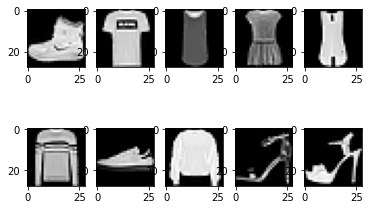

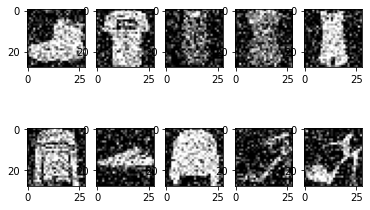

In [ ]:
import matplotlib.pyplot as plt

for idx, i in enumerate(x_train[:10]):
  img = np.squeeze(i)
  plt.subplot(2,5,idx+1)
  plt.imshow(img, cmap='gray')

plt.figure()
for idx, i in enumerate(x_train_noisy[:10]):
  img = np.squeeze(i)
  plt.subplot(2,5,idx+1)
  plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

conv_input = Input(shape=(28,28,1))
encoder = Conv2D(16,(3,3), activation='relu', padding='same')(conv_input)
encoder = MaxPooling2D((2,2), padding='same')(encoder)
encoder = Conv2D(8,(3,3), activation='relu', padding='same')(encoder)
encoder = MaxPooling2D((2,2), padding='same')(encoder)
encoder = Conv2D(8,(3,3), activation='relu', padding='same')(encoder)
encoded = MaxPooling2D((2,2), padding='same')(encoder)

decoder = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(8, (3,3), activation='relu', padding='same')(decoder)
decoder = UpSampling2D((2,2))(decoder)
decoder = Conv2D(16, (3,3), activation='relu')(decoder)
decoder = UpSampling2D((2,2))(decoder)

decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoder)

autoencoder = Model(conv_input, decoded)
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0     

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 [==============================] - 7s 19ms/step - loss: 0.4087 - val_loss: 0.3608
Epoch 2/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3513 - val_loss: 0.3410
Epoch 3/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3383 - val_loss: 0.3324
Epoch 4/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3309 - val_loss: 0.3290
Epoch 5/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3260 - val_loss: 0.3275
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3225 - val_loss: 0.3230
Epoch 7/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3200 - val_loss: 0.3178
Epoch 8/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3179 - val_loss: 0.3233
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.3161 - val_loss: 0.3155
Epoch 10/100
235/235 [==============================] - 4s 16ms/step - loss: 0.314

In [ ]:
predict = autoencoder.predict(x_test_noisy[:5])

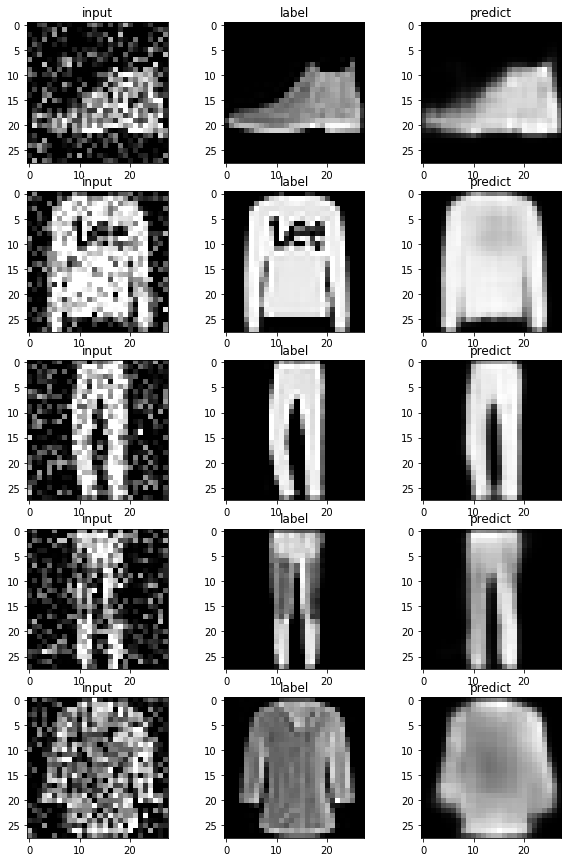

In [ ]:
idx = 0
plt.figure(figsize=(10,15))
for i, j, k in zip(x_test_noisy[:5], x_test[:5], predict[:5]):
  plt.subplot(5,3,idx+1)
  plt.imshow(i.squeeze(), cmap='gray')
  plt.title('input')
  plt.subplot(5,3,idx+2)
  plt.imshow(j.squeeze(), cmap='gray')
  plt.title('label')
  plt.subplot(5,3,idx+3)
  plt.imshow(k.squeeze(), cmap='gray')
  plt.title('predict')
  idx += 3
plt.show()